In [1]:
from importlib import resources
import csv
import numpy as np
import pandas as pd


In [2]:
DATA_FOLDER = "datasets"
DATA_FOLDER

'datasets'

In [4]:
data_filename = "linnerud_exercise.csv"

with resources.open_text(DATA_FOLDER, data_filename) as csv_file:
    water_data = csv_file.readline().split()
    print(water_data)
    f = csv_file.seek(2)
    print(f)
    data = np.loadtxt(csv_file, skiprows=1)
    print(data)

['Chins', 'Situps', 'Jumps']
2
[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]


In [5]:
def load_csv(data_file_name, *, data_folder=DATA_FOLDER):

    with resources.open_text(data_folder, data_file_name) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = int(temp[0])
        n_features = int(temp[1])
        target_names = np.array(temp[2:])
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples), dtype=int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=int)

        return data, target, target_names

In [7]:
data_filename = "water.csv"

load_csv(data_file_name=data_filename)

ValueError: could not convert string to float: ''

In [12]:
data_file_name = "water.csv"
data, target, target_names = load_csv(
        data_file_name=data_file_name
)

In [15]:
target_names

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability'], dtype='<U15')

In [9]:
def convert_to_df(data, target, feature_names, target_names):

    data_df = pd.DataFrame(data, columns=target_names)

    target_df = pd.DataFrame(target, columns=target_names)
    combined_df = pd.concat([data_df, target_df], axis=1)
    X = combined_df[feature_names]
    y = combined_df[target_names]

    if y.shape[1] == 1:
        y = y.iloc[: , 0]
    
    return combined_df, X, y

In [11]:
feature_names = [
        "ph",
        "Hardness",
        "Solids",
        "Chloramines",
        "Sulfate",
        "Conductivity",
        "Organic_carbon",
        "Trihalomethanes",
        "Turbidity",
        "Potability",
    ]

target_cols = [
        "target"
    ]

In [17]:


frame, data, target = convert_to_df(
            data, target, feature_names, target_cols
        )

ValueError: Shape of passed values is (3276, 10), indices imply (3276, 1)

In [24]:
df = pd.read_csv("datasets/water.csv")
df.ap

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [29]:
df1 = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))

In [30]:
df1

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [31]:
df1.fillna(df1.mean())

,A,B,C,D
0,3.0,2.0,NaN,0.000000
1,3.0,4.0,NaN,1.000000
2,3.0,3.0,NaN,1.666667
3,3.0,3.0,NaN,4.000000


In [32]:
df.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [6]:
df = pd.read_csv("datasets/iris.csv")
df

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
df = pd.read_csv("datasets/water.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [36]:
is_null = df.isnull().any()
is_null
# xt = is_null.any()
# xt

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [42]:
data_file_name = "datasets/water.csv"
def fnull(data_file_name):
    df = pd.read_csv(data_file_name)
    is_null = df.isnull().any()
    
    if is_null.any() == True:
        df = df.fillna(df.mean())
        print(df)
        return df



In [43]:
df = fnull(data_file_name=data_file_name)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [49]:
h = df.iloc(0)
h

In [51]:
new_header = ["","","","","","","3276","10", "class_0", "class_1"]

df2 = df.set_axis(new_header, axis=1, inplace=False)
df2

,,,,,,,3276,10,class_0,class_1
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [52]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [33]:
new_header = ["3276","10", "class_0", "class_1"]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [83]:
df.fillna(df.mean())

,,,,,,3276,10,Potable,notPotable
NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...
4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,66.396293,2.798243,1
9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [11]:
def fill_null(data_file_name):

    csv_file = pd.read_csv(data_file_name)
    is_null = csv_file.isnull().any()

    if is_null.any() == True:
        df = csv_file.fillna(csv_file.mean())

        return df



In [13]:
data_file_name = "datasets/wine_data.csv"

dd = fill_null(data_file_name)
dd

In [2]:
import csv
import pandas as pd
from matplotlib.pyplot import nipy_spectral
import numpy as np
from importlib import resources
from sklearn.utils import Bunch

In [2]:
DATA_FOLDER = "datasets"

In [4]:
def fill_null(data_file_name) -> object:

    csv_file = pd.read_csv(data_file_name)
    is_null = csv_file.isnull().any()

    if is_null.any() == True:
        df = csv_file.fillna(csv_file.mean())

        return df

In [8]:
def load_csv(data_file_name, *, data_folder=DATA_FOLDER, fnull=False):

    fnull=None
    if fnull:
        data = fill_null(data_file_name=data_file_name)

    with resources.open_text(data_folder, data_file_name) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = int(temp[0])
        n_features = int(temp[1])
        target_names = np.array(temp[2:])
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples), dtype=int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=int)
        
        return data, target, target_names

In [13]:
data_file_name = "wine_data.csv"

data, target, target_names = load_csv(
        data_file_name=data_file_name
    )


print(target_names)
print("=====================================================")
print("=====================================================\n")
print(data[0])
print(target[0])

['class_0' 'class_1' 'class_2']

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
0


In [14]:
data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
data_file_name = "water.csv"

data, target, target_names = load_csv(
        data_file_name=data_file_name
    )


print(data)
print("=====================================================")
print("=====================================================\n")
print(target_names)
print("=====================================================")
print("=====================================================\n")
print(target)

ValueError: could not convert string to float: ''

In [97]:
def load_water(*, retun_X_y=False, fnull=False):

    data_file_name = "water_dim.csv"

    data, target, target_names = load_csv(
        data_file_name=data_file_name
    )

    feature_names = [
        "ph",
        "Hardness",
        "Solids",
        "Chloramines",
        "Sulfate",
        "Conductivity",
        "Organic_carbon",
        "Trihalomethanes",
        "Turbidity",
        "Potability",
    ]

    fnull=None
    target_cols = [
        "target"
    ]
    
    if fnull:
        data = fill_null(data_file_name=data_file_name)

    return Bunch(
        data=data,
        target=target,
        target_names=target_names,
        feature_names=feature_names,
        filename=data_file_name,
        data_folder=DATA_FOLDER,
    )

In [98]:
load_water()

{'data': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.18069468e-95, 9.34573370e-67, 1.39838989e-76, ...,
         5.63895591e-38, 7.71798793e-43, 3.88887682e-33],
        [1.57752757e-52, 1.04015225e-42, 3.42752389e-62, ...,
         6.74350495e-67, 1.25758435e-71, 1.08513648e-71],
        [7.49113051e-67, 3.93800933e-62, 5.64007703e-38, ...,
         5.40030076e-62, 1.20032051e-71, 1.20053898e-71]]),
 'target': array([    139655217124416,     139655217124416,      94262982543184, ...,
        4635238327773528270, 4613854806498047903, 4616753306908076232]),
 'target_names': array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
        'Conductivit

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data[:2]
y = iris.target

print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
from utils import load_water

water = load_water()

x = water.data[:]
y = water.target

print(x)
print("=====================================================")
print("=====================================================\n")
print(y)


[[1.57728861e-052 1.25758176e-071 4.92012852e-063 ... 4.66253590e-062
  5.64244514e-062 3.46228612e-086]
 [9.74149636e-072 3.82062538e-086 5.40031190e-062 ... 2.21500665e-052
  7.49982405e-067 9.73264425e-072]
 [3.05812635e-057 5.88345378e-062 1.58821653e-047 ... 4.27633154e-033
  6.37980630e-067 7.11631922e-038]
 ...
 [5.60270442e-321 0.00000000e+000 6.33145125e-320 ... 4.64214100e-310
  5.62740771e-321 0.00000000e+000]
 [6.33145125e-320 4.64214100e-310 5.62246705e-321 ... 0.00000000e+000
  6.33145125e-320 4.64214100e-310]
 [5.51871326e-321 0.00000000e+000 6.33145125e-320 ... 4.64214100e-310
  5.50883195e-321 0.00000000e+000]]

[     93957978481616      93957978980080                   0 ...
 4640388114910847012 4642317664973500870 4641068568433080446]


In [8]:
iris = load_iris()

x = iris.data[:2]
y = iris.target

print(x)
print("=====================================================")
print("=====================================================\n")
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
data_file_name = "datasets/water.csv"

def fill_null(data_file_name, fnull=False) -> object:
    """Helper function to fill the Null values in a csv with the mean

    Args:
        data_file_name (_type_): _description_
        fnull (bool, optional): _description_. Defaults to False.

    Returns:
        object: _description_
    """
    
    csv_file = pd.read_csv(data_file_name)
    
    #fnull=None
    # TODO: make the new_header file agnostic
    new_header = ["","","","","","","3276","10", "class_0", "class_1"]

    if fnull:
        is_null = csv_file.isnull().any()
        
        if is_null.any() == True:
            df = csv_file.fillna(csv_file.mean())
            df2 = df.set_axis(new_header, axis=1, inplace=False)

            return df2
    else: 
        return csv_file

In [17]:
test = fill_null(data_file_name=data_file_name, fnull=True)
test

,,,,,,,3276,10,class_0,class_1
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [6]:
def load_csv(data_file_name, *, data_folder=DATA_FOLDER):

    with resources.open_text(data_folder, data_file_name) as csv_file:
        
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = int(temp[0])
        n_features = int(temp[1])
        target_names = np.array(temp[2:])
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples), dtype=int)
        
        return data, target, target_names

In [9]:
import os
from pathlib import Path

DATA_FOLDER = Path("datasets")

def fill_null(data_file_name, *, data_folder=DATA_FOLDER, fnull=False) -> object:
    """Helper function to fill the Null values in a csv with the mean

    Args:
        data_file_name (_type_): _description_
        fnull (bool, optional): _description_. Defaults to False.

    Returns:
        object: _description_
    """
    file_path = os.path.join(data_folder, data_file_name)
    with open(file_path) as csv_file:
        csv_file = pd.read_csv(csv_file)
        
        #fnull=None
        # TODO: make the new_header file agnostic
        new_header = ["","","","","","","3276","10", "class_0", "class_1"]

        if fnull:
            is_null = csv_file.isnull().any()
            
            if is_null.any() == True:
                df = csv_file.fillna(csv_file.mean())
                df2 = df.set_axis(new_header, axis=1, inplace=False)

                return df2
        else: 
            return csv_file

In [5]:

data = "water.csv"

data = fill_null(data_file_name=data, fnull=True)

#data = data.reset_index(drop=True, inplace=True)
data

FileNotFoundError: [Errno 2] No such file or directory: 'water.csv'

In [ ]:
data

In [57]:
# tmp_path = Path("tmp/out.csv")
# tmp_path.parent.mkdir(parents=True, exist_ok=True)
# data.to_csv(tmp_path, index=False)

In [64]:
def tmp_read(data_file_name):

    tmp_path = Path("tmp/out.csv")
    if os.path.exists(tmp_path):
        os.remove(tmp_path)
    else:
        tmp_path.parent.mkdir(parents=True, exist_ok=True)
    
    return data_file_name.to_csv(tmp_path, index=False)

In [69]:
DATA_FOLDER = Path("datasets")
TMP_FOLDER = Path("tmp")
DATA_FOLDER

PosixPath('datasets')

In [39]:
TMP_FOLDER = Path("tmp")

def load_csv(data_file_name, *, data_folder=TMP_FOLDER):
    path_to_tmp = os.path.join(TMP_FOLDER, data_file_name)
    with open(path_to_tmp) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = int(temp[0])
        n_features = int(temp[1])
        target_names = np.array(temp[2:])
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples), dtype=int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=int)

    return data, target, target_names

In [40]:
# path_to_tmp = "tmp/out.csv"

# with open(path_to_tmp) as csv_file:
#     data_file = csv.reader(csv_file)
#     #print(data_file)
#     temp = next(data_file)
#     print(temp)
#     n_samples = int(temp[0])
#     n_features = int(temp[1])
#     target_names = np.array(temp[2:])
#     data = np.empty((n_samples, n_features))
#     print(data.shape)
#     target = np.empty((n_samples), dtype=int)
#     print(target.shape)

#     for i, ir in enumerate(data_file):
#         data[i] = np.asarray(ir[:-1], dtype=np.float64)
#         target[i] = np.asarray(ir[-1], dtype=int)


In [41]:

data = "out.csv"

data, target, target_names = load_csv(data_file_name=data)

In [44]:
target_names

array(['class_0', 'class_1'], dtype='<U7')

In [54]:
from sklearn.utils import Bunch

def load_water(*, return_X_y=False):
    """Loads the watr dataset

    =================   =======================================
    Classes                          2      Potable/notPotable
    Samples per class               
    Samples total                  3276     
    Dimensionality                   10
    Features            real, positive
    =================   =======================================


    Args:
        return_X_y (bool, optional): _description_. Defaults to False.
        fnull (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """

    data_file_name = "out.csv"

    data, target, target_names = load_csv(
        data_file_name=data_file_name
    )

    feature_names = [
        "ph",
        "Hardness",
        "Solids",
        "Chloramines",
        "Sulfate",
        "Conductivity",
        "Organic_carbon",
        "Trihalomethanes",
        "Turbidity",
    ]

   
    target_cols = [
        "target"
    ]
    

    if return_X_y:
        return data, target

    return Bunch(
        data=data,
        target=target,
        target_names=target_names,
        feature_names=feature_names,
        filename=data_file_name,
        data_folder=DATA_FOLDER,
    )



In [55]:
water = load_water()
water

{'data': array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
         1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
        [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
         1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
        [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
         1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
        ...,
        [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
         1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
        [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
         1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
        [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
         1.61403676e+01, 7.86984463e+01, 2.30914906e+00]]),
 'target': array([0, 0, 0, ..., 1, 1, 1]),
 'target_names': array(['class_0', 'class_1'], dtype='<U7'),
 'feature_names': ['ph',
  'Hardness',
  'Solids',
  'Chloramines',
  'Sulfate',
  'Conductivity',
  'Organic_carbon',
  'Trihalomethanes',
  'Turbidity'

In [1]:
from utils import load_water
from sklearn import tree

water = load_water()

X, y = water.data, water.target

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(96.89223152751852, 214.33371428571428, 'X[4] <= 258.97\ngini = 0.476\nsamples = 3276\nvalue = [1998, 1278]'),
 Text(4.518123352662098, 208.12114285714284, 'X[2] <= 21161.408\ngini = 0.394\nsamples = 89\nvalue = [24, 65]'),
 Text(2.823827095413811, 201.90857142857143, 'X[0] <= 7.947\ngini = 0.477\nsamples = 28\nvalue = [17, 11]'),
 Text(2.259061676331049, 195.696, 'X[4] <= 224.865\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(1.1295308381655245, 189.48342857142856, 'X[8] <= 3.142\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5647654190827622, 183.27085714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1.6942962572482867, 183.27085714285715, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(3.3885925144965734, 189.48342857142856, 'X[3] <= 4.178\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(2.823827095413811, 183.27085714285715, 'X[1] <= 172.545\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(2.259061676331049, 177.05828571428572, 'gini = 0.0\nsa

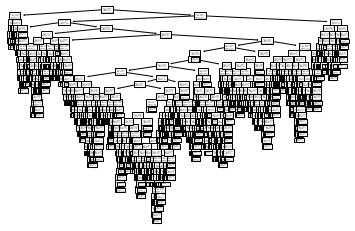

In [2]:
tree.plot_tree(clf)

In [3]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("water")

'water.pdf'

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=water.feature_names,
                                class_names=water.target_names,
                                filled=True, rounded=True,
                                special_characters=True)



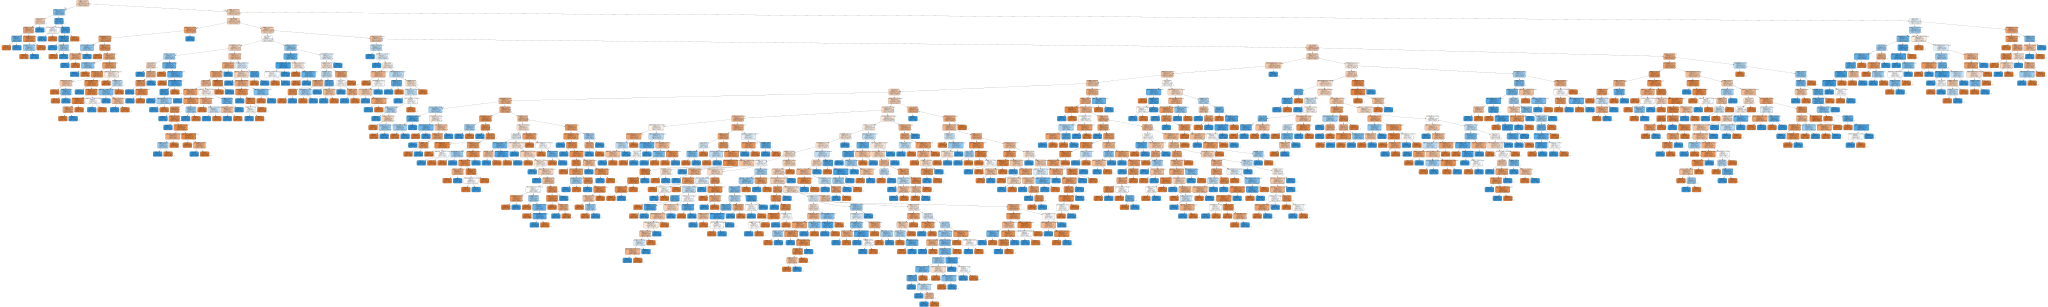

In [5]:
graph = graphviz.Source(dot_data)  
graph